In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

def get_data(path_documents,path_labels):
    documents, labels = [],[]

    # with te da la ventaja de que una vez se ejecute todo lo que hay en ese
    # entorno, cerrará los archivos de texto que abrió. No cerrarlos puede
    # ocasionar problemas
    with open(path_documents,"r") as corpus, open(path_labels,"r") as lbs:
        for document in corpus:
            documents.append(document)
        for etiqueta in lbs:
            # 0 si el usuario no es agresivo contr otra persona y 1 si lo es
            labels.append(etiqueta[0])
    return documents, labels


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessio



/kaggle/input/twits-agresivos/twits_agresivos/mex_val.txt
/kaggle/input/twits-agresivos/twits_agresivos/mex_train_labels.txt
/kaggle/input/twits-agresivos/twits_agresivos/mex_val_labels.txt
/kaggle/input/twits-agresivos/twits_agresivos/mex_train.txt


# Leemos los datos de entrenamiento y prueba y los guardamos en variables

In [ ]:
train_documents, train_labels = get_data("/kaggle/input/twits-agresivos/twits_agresivos/mex_train.txt",'/kaggle/input/twits-agresivos/twits_agresivos/mex_train_labels.txt')
test_documents, test_labels   = get_data("/kaggle/input/twits-agresivos/twits_agresivos/mex_val.txt",'/kaggle/input/twits-agresivos/twits_agresivos/mex_val_labels.txt')
print(train_documents[0],'\n','Etiqueta: ',train_labels[0])

lo peor de todo es que no me dan por un tiempo y luego vuelven estoy hasta la verga de estl
 
 Etiqueta:  0


# Un histograma de los casos positivos y negativos en el conjunto de entrenamiento

Counter({'0': 3563, '1': 1981})
Conjunto de entrenamiento con:  5544


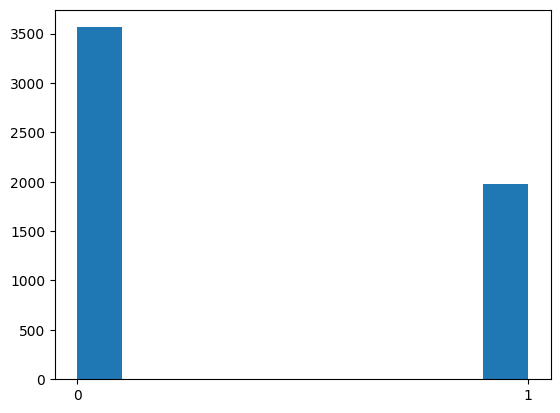

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Conjunto de datos desvalanceado

print(Counter(train_labels))
plt.hist(train_labels)
print('Conjunto de entrenamiento con: ', len(train_labels))

# Separamos los datos de entrenamiento y en validación y entrenamiento.
# Con los parámetros usado en el tfidf se obtiene una representación binaria de los documentos

 Esto no es un one hot encoding. En el one hot encoding se obtiene una representación vecotrial de una palabra y por lo tanto, una sequencia de vectores representa un documento. Aquí estamos obteniendo una representación vectorial de documentos.

 Esta bolsa de palabras consideran solo monogramas (no mejora la precisión al usar bigramas).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import random


# Para trabajar con un esquema de pesado Binario (1 si la palabra está en el docuemnto
# y 0 en caso contrario) se deben de poner los argumentos binary = True, use_idf = False
# y norm = None.
vectorizer = TfidfVectorizer(input = 'content',binary = True,use_idf = False,norm = None, max_features = 7000,ngram_range=(1,2))
# vectorizer.fit ajusta una bolsa de palabras a

# Separando datos de prueba y entrenamiento
indices_aleatorios =  random.sample(set(np.arange(0,len(train_documents))),k = int(.1*len(train_documents)))
val_documents      = list(np.array(train_documents)[indices_aleatorios])
train_documents    = list(np.delete(np.array(train_documents),indices_aleatorios))
val_labels         = list(np.array(train_labels)[indices_aleatorios])
train_labels       = list(np.delete(np.array(train_labels),indices_aleatorios))


train_BoW  = vectorizer.fit(train_documents).transform(train_documents)
val_BoW    = vectorizer.fit(train_documents).transform(val_documents)
test_BoW   = vectorizer.fit(train_documents).transform(test_documents)

print(train_BoW.shape)
print(val_BoW.shape)
print(test_BoW.shape)




/tmp/ipykernel_33/232774394.py:12: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  indices_aleatorios =  random.sample(set(np.arange(0,len(train_documents))),k = int(.1*len(train_documents)))


(4990, 7000)
(554, 7000)
(616, 7000)


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

hiper_params = { 'C': [.04,.05,.065,.12,.25,.5,1, 2, 4]}

tweet_svm = svm.LinearSVC(class_weight= 'balanced')
grid      = GridSearchCV(tweet_svm,param_grid= hiper_params,scoring='f1_macro',cv=5)
grid.fit(train_BoW,train_labels)
print(grid.best_params_)

train_pred = grid.predict(train_BoW)

print(confusion_matrix(train_labels,train_pred))
print(metrics.classification_report(train_labels,train_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'C': 0.05}
[[3051  147]
 [  54 1738]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3198
           1       0.92      0.97      0.95      1792

    accuracy                           0.96      4990
   macro avg       0.95      0.96      0.96      4990
weighted avg       0.96      0.96      0.96      4990



/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# En los datos de validación se obtiene una precisión del 79-82 por ciento.

In [ ]:
val_pred = grid.predict(val_BoW)

print(confusion_matrix(val_labels,val_pred))
print(metrics.classification_report(val_labels,val_pred))

[[302  63]
 [ 44 145]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       365
           1       0.70      0.77      0.73       189

    accuracy                           0.81       554
   macro avg       0.78      0.80      0.79       554
weighted avg       0.81      0.81      0.81       554



# Si usamos un esquema de pesos tfidf usual se tienen los siguientes resultados


In [ ]:
train_documents, train_labels = get_data("/kaggle/input/twits-agresivos/twits_agresivos/mex_train.txt",'/kaggle/input/twits-agresivos/twits_agresivos/mex_train_labels.txt')


vectorizer = TfidfVectorizer(input = 'content',norm= None,use_idf = False, max_features = 5000,ngram_range=(1,2))
# vectorizer.fit ajusta una bolsa de palabras a

# Separando datos de prueba y entrenamiento
indices_aleatorios = random.sample(set(np.arange(0,len(train_documents))),k = int(.1*len(train_documents)))
val_documents      = list(np.array(train_documents)[indices_aleatorios])
train_documents    = list(np.delete(np.array(train_documents),indices_aleatorios))
val_labels         = list(np.array(train_labels)[indices_aleatorios])
train_labels       = list(np.delete(np.array(train_labels),indices_aleatorios))


train_BoW  = vectorizer.fit(train_documents).transform(train_documents)
val_BoW    = vectorizer.fit(train_documents).transform(val_documents)
test_BoW   = vectorizer.fit(train_documents).transform(test_documents)



hiper_params = { 'C': [.05,.12,.25,.5,1, 2, 4]}

tweet_svm = svm.LinearSVC(class_weight= 'balanced')
grid      = GridSearchCV(tweet_svm,param_grid= hiper_params,scoring='f1_macro',cv=5)
grid.fit(train_BoW,train_labels)
print(grid.best_params_)

train_pred = grid.predict(train_BoW)

print("En los datos de prueba: \n",confusion_matrix(train_labels,train_pred))
print(metrics.classification_report(train_labels,train_pred))


val_pred = grid.predict(val_BoW)

print("En los datos de validación: \n",confusion_matrix(val_labels,val_pred))
print(metrics.classification_report(val_labels,val_pred))


/tmp/ipykernel_34/3024182701.py:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  indices_aleatorios = random.sample(set(np.arange(0,len(train_documents))),k = int(.1*len(train_documents)))
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'C': 0.05}
En los datos de prueba: 
 [[3024  184]
 [  72 1710]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3208
           1       0.90      0.96      0.93      1782

    accuracy                           0.95      4990
   macro avg       0.94      0.95      0.94      4990
weighted avg       0.95      0.95      0.95      4990

En los datos de validación: 
 [[293  62]
 [ 50 149]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       355
           1       0.71      0.75      0.73       199

    accuracy                           0.80       554
   macro avg       0.78      0.79      0.78       554
weighted avg       0.80      0.80      0.80       554



/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


No hay demasiada mejoría al usar un esquema de pesado para textos cortos como lo es el tfidf. Tal vez mejora 2 porciento la clasificación.

# Ahora usaremos un esquema de reprsentación de documentos DOR con esquema de pesado tfidf

In [ ]:
def DOR_representation(BoW,df = "frecuencia",use_idf_bow = True,alfa = "frecuencia"):
    """ Recibe una matriz BoW con esquema de pesado por frecuencias.
        df = manera de calcular el témirno df en el df*idf.
        alfa = Manera de realizar la ponderación para representar un docuemnto.
    """

    DOR = np.zeros(shape = (BoW.shape[0],BoW.shape[0]))
    DOR_words = np.zeros(shape = (BoW.shape[1],BoW.shape[0]))
    T = BoW.shape[1]
    for i in range(BoW.shape[0]):
        if len(np.nonzero(BoW[i,:])[0]) == 0:
            print("El documento ",i, " no tiene contenido en la BoW")
            idf = 1
        elif use_idf_bow == True:
            idf = np.log( T/ len(np.nonzero(BoW[i,:])[0]) )
        elif use_idf_bow == False:
            idf = 1
        for j in np.nonzero(BoW[i,:])[0]:
            if df == "frecuencia":
                #df = BoW[i,j]
                df = BoW[i,j]/len(np.nonzero(BoW[i,:])[0])
            elif df == "sublinear_tf":
                df = 1 + np.log(BoW[i,j])
            elif df == 'binario':
                df = 1.0

            DOR_words[j,i] = df*idf

    D = BoW.shape[0]
    for i in range(BoW.shape[0]):
        for idx in np.where(BoW[i,:] != 0)[0]:
            if alfa == "frecuencia":
                a = BoW[i,idx]
            elif alfa == "binario":
                a = 1
            elif alfa == "tfidf":
                a = (1 + np.log(BoW[i,idx]))*np.log( D/ len(np.where(BoW[:,idx] != 0)[0]) )
            DOR[i,:] = DOR[i,:] +  a*DOR_words[idx,:]

    return DOR_words, DOR


In [ ]:
DTR, DOR = DOR_representation(BoW = np.concatenate((train_BoW.toarray(),val_BoW.toarray()),axis = 0),df = "frecuencia",use_idf_bow = False,alfa = "frecuencia")
train_labels = np.concatenate((train_labels,val_labels),axis =0 )
#a, train_labels = get_data("/kaggle/input/twits-agresivos/twits_agresivos/mex_train.txt",'/kaggle/input/twits-agresivos/twits_agresivos/mex_train_labels.txt')

#indices_aleatorios = random.sample(set(np.arange(0,DOR.shape[0])),k = int(.1*DOR.shape[0]))
#val_DOR            = DOR[indices_aleatorios,:]
#train_DOR          = DOR[np.delete(np.arange(DOR.shape[0]),indices_aleatorios),:]
#val_labels         = list(np.array(train_labels)[indices_aleatorios])
#train_labels       = list(np.delete(np.array(train_labels),indices_aleatorios))
train_DOR          = DOR[:DOR.shape[0]-int(.1*DOR.shape[0]),:]
val_DOR            = DOR[DOR.shape[0]-int(.1*DOR.shape[0]):,:]
#val_labels         = list(np.array(train_labels)[indices_aleatorios])
#train_labels       = list(np.delete(np.array(train_labels),indices_aleatorios))
val_labels         = train_labels[DOR.shape[0]-int(.1*DOR.shape[0]):]
train_labels       = train_labels[:DOR.shape[0]-int(.1*DOR.shape[0])]



hiper_params = { 'C': [1]}
#hiper_params = { 'C': [.5],'gamma': [10]}


tweet_svm = svm.LinearSVC(class_weight= 'balanced')
#tweet_svm = svm.LinearSVC(class_weight= 'balanced')
#tweet_svm = svm.SVC(class_weight= 'balanced')
#tweet_svm.fit(train_DOR,train_labels)
grid      = GridSearchCV(tweet_svm,param_grid= hiper_params,scoring='f1_macro',cv=5)
grid.fit(train_DOR,train_labels)
print(grid.best_params_)

train_pred = grid.predict(train_DOR)
#train_pred = tweet_svm.predict(train_DOR)

print("En los datos de prueba: \n",confusion_matrix(train_labels,train_pred))
print(metrics.classification_report(train_labels,train_pred))




El documento  656  no tiene contenido en la BoW


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'C': 1}
En los datos de prueba: 
 [[2866  342]
 [ 196 1586]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3208
           1       0.82      0.89      0.85      1782

    accuracy                           0.89      4990
   macro avg       0.88      0.89      0.88      4990
weighted avg       0.90      0.89      0.89      4990



/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:

val_pred = grid.predict(val_DOR)
#val_pred = tweet_svm.predict(val_DOR)

print("En los datos de validación: \n",confusion_matrix(val_labels,val_pred))
print(metrics.classification_report(val_labels,val_pred))


En los datos de validación: 
 [[290  65]
 [ 45 154]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       355
           1       0.70      0.77      0.74       199

    accuracy                           0.80       554
   macro avg       0.78      0.80      0.79       554
weighted avg       0.81      0.80      0.80       554



# Si hacemos feature selection y nos quedamos con 1500 términos o n-gramas, el performance es bastante similar

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

train_documents, train_labels = get_data("/kaggle/input/twits-agresivos/twits_agresivos/mex_train.txt",'/kaggle/input/twits-agresivos/twits_agresivos/mex_train_labels.txt')


indices_aleatorios =  random.sample(set(np.arange(0,len(train_documents))),k = int(.1*len(train_documents)))
val_documents      = list(np.array(train_documents)[indices_aleatorios])
train_documents    = list(np.delete(np.array(train_documents),indices_aleatorios))
val_labels         = list(np.array(train_labels)[indices_aleatorios])
train_labels       = list(np.delete(np.array(train_labels),indices_aleatorios))

vectorizer = TfidfVectorizer(input = 'content',norm= 'l2', sublinear_tf=True,
                             max_features = 5000,ngram_range=(1,2))

train_BoW  = vectorizer.fit(train_documents).transform(train_documents)

feats = SelectKBest(chi2,k=1500)
feats.fit(train_BoW,train_labels)
best = feats.get_support(indices= True)


#vectorizer = TfidfVectorizer(input = 'content',norm = 'l2', max_features = 5000,ngram_range=(1,2))
# vectorizer.fit ajusta una bolsa de palabras a

# Nos quedamos solo con las características o n-gramas importantes.

train_BoW  = vectorizer.fit(train_documents).transform(train_documents)[:,best]
val_BoW    = vectorizer.fit(train_documents).transform(val_documents)[:,best]
test_BoW   = vectorizer.fit(train_documents).transform(test_documents)[:,best]

print(train_BoW.shape)
print(val_BoW.shape)
print(test_BoW.shape)

hiper_params = { 'C': [.04,.05,.065,.12,.25,.5,1, 2, 4]}

tweet_svm = svm.LinearSVC(class_weight= 'balanced')
grid      = GridSearchCV(tweet_svm,param_grid= hiper_params,scoring='f1_macro',cv=5)
grid.fit(train_BoW,train_labels)
print(grid.best_params_)

train_pred = grid.predict(train_BoW)

print(confusion_matrix(train_labels,train_pred))
print(metrics.classification_report(train_labels,train_pred))


val_pred = grid.predict(val_BoW)

print(confusion_matrix(val_labels,val_pred))
print(metrics.classification_report(val_labels,val_pred))
#print("Las 1000 más importantes: ",vectorizer.get_feature_names_out()[best])



vectorizer = TfidfVectorizer(input = 'content',norm= None, use_idf=False ,
                             max_features = 5000,ngram_range=(1,2))

train_BoW  = vectorizer.fit(train_documents).transform(train_documents)[:,best]
val_BoW    = vectorizer.fit(train_documents).transform(val_documents)[:,best]


/tmp/ipykernel_34/2714902546.py:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  indices_aleatorios =  random.sample(set(np.arange(0,len(train_documents))),k = int(.1*len(train_documents)))


(4990, 1500)
(554, 1500)
(616, 1500)
{'C': 2}
[[2960  255]
 [ 143 1632]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3215
           1       0.86      0.92      0.89      1775

    accuracy                           0.92      4990
   macro avg       0.91      0.92      0.91      4990
weighted avg       0.92      0.92      0.92      4990

[[297  51]
 [ 54 152]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       348
           1       0.75      0.74      0.74       206

    accuracy                           0.81       554
   macro avg       0.80      0.80      0.80       554
weighted avg       0.81      0.81      0.81       554



In [ ]:
from sklearn import preprocessing

DTR, DOR = DOR_representation(BoW = np.concatenate((train_BoW.toarray(),val_BoW.toarray()),axis = 0),df = "frecuencia",use_idf_bow=False,alfa = "tfidf")
train_labels = np.concatenate((train_labels,val_labels),axis =0 )
#a, train_labels = get_data("/kaggle/input/twits-agresivos/twits_agresivos/mex_train.txt",'/kaggle/input/twits-agresivos/twits_agresivos/mex_train_labels.txt')

#indices_aleatorios = random.sample(set(np.arange(0,DOR.shape[0])),k = int(.1*DOR.shape[0]))
#val_DOR            = DOR[indices_aleatorios,:]
#train_DOR          = DOR[np.delete(np.arange(DOR.shape[0]),indices_aleatorios),:]
train_DOR          = DOR[:DOR.shape[0]-int(.1*DOR.shape[0]),:]
val_DOR            = DOR[DOR.shape[0]-int(.1*DOR.shape[0]):,:]
#val_labels         = list(np.array(train_labels)[indices_aleatorios])
#train_labels       = list(np.delete(np.array(train_labels),indices_aleatorios))
val_labels         = train_labels[DOR.shape[0]-int(.1*DOR.shape[0]):]
train_labels       = train_labels[:DOR.shape[0]-int(.1*DOR.shape[0])]

#hiper_params = { 'C': [1]}
#hiper_params = { 'C': [.5],'gamma': [10]}


tweet_svm = svm.LinearSVC(class_weight= 'balanced', C = .005)
#tweet_svm = svm.SVC(class_weight= {'1':1.5})
tweet_svm.fit(train_DOR,train_labels)
#grid      = GridSearchCV(tweet_svm,param_grid= hiper_params,scoring='f1_macro',cv=5)
#scaler =  preprocessing.StandardScaler().fit(train_DOR)
#train_DOR_scaled = scaler.transform(train_DOR)
#train_DOR_scaled = train_DOR
#grid.fit(train_DOR,train_labels)
#print(grid.best_params_)

#train_pred = grid.predict(train_DOR_scaled)
train_pred = tweet_svm.predict(train_DOR)

print("En los datos de prueba: \n",confusion_matrix(train_labels,train_pred))
print(metrics.classification_report(train_labels,train_pred))


#val_pred = grid.predict(scaler.transform(val_DOR))
#val_pred = grid.predict(val_DOR)
val_pred = tweet_svm.predict(val_DOR)

print("En los datos de validación: \n",confusion_matrix(val_labels,val_pred))
print(metrics.classification_report(val_labels,val_pred))


El documento  60  no tiene contenido en la BoW
El documento  72  no tiene contenido en la BoW
El documento  126  no tiene contenido en la BoW
El documento  140  no tiene contenido en la BoW
El documento  204  no tiene contenido en la BoW
El documento  421  no tiene contenido en la BoW
El documento  581  no tiene contenido en la BoW
El documento  883  no tiene contenido en la BoW
El documento  1428  no tiene contenido en la BoW
El documento  2349  no tiene contenido en la BoW
El documento  3036  no tiene contenido en la BoW
El documento  3429  no tiene contenido en la BoW
El documento  3454  no tiene contenido en la BoW
El documento  3547  no tiene contenido en la BoW
El documento  3951  no tiene contenido en la BoW
El documento  3996  no tiene contenido en la BoW
El documento  4348  no tiene contenido en la BoW
El documento  4427  no tiene contenido en la BoW
El documento  4462  no tiene contenido en la BoW
El documento  4523  no tiene contenido en la BoW
El documento  4847  no tiene c

In [ ]:
print(val_DOR.shape)
print(val_pred.shape)
print(val_labels.shape)

(554, 5544)
(554,)
(554,)


# TSNE del DOR

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

embed_DOR_train = TSNE().fit_transform(train_DOR)

print(embed_DOR_train.shape)

(4990, 2)


In [ ]:
embed_DOR_val = TSNE().fit_transform(val_DOR)

print(embed_DOR_val.shape)

(554, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

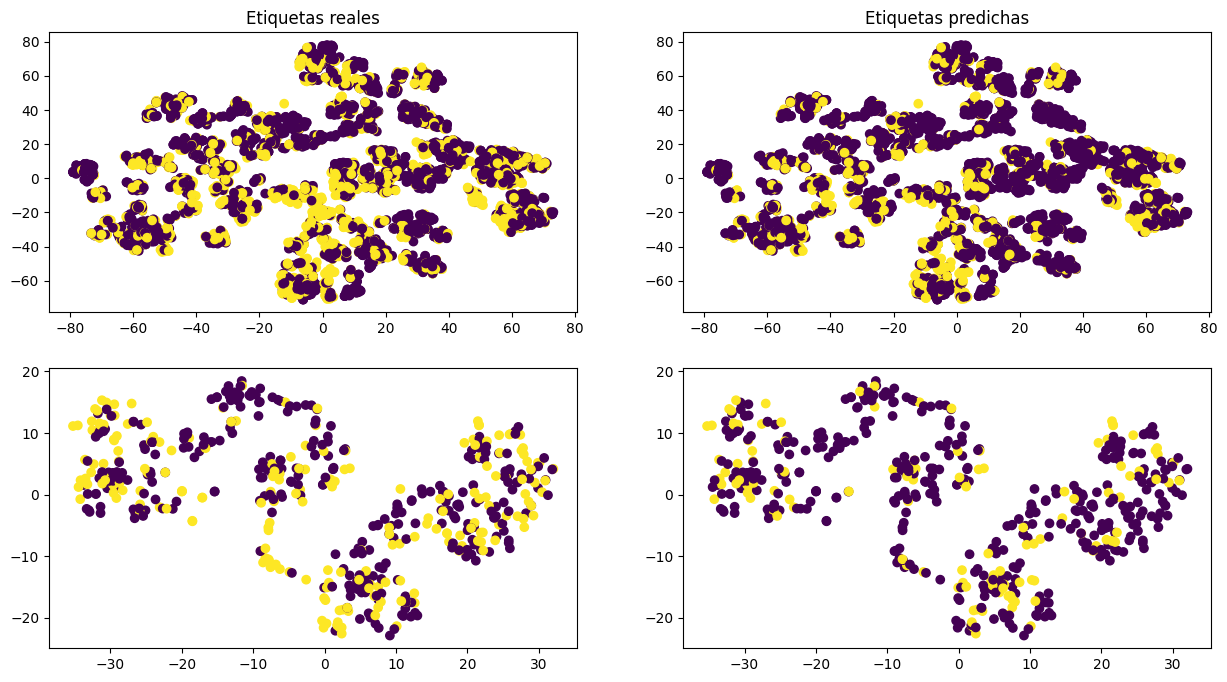

In [ ]:
#plt.scatter(embed_DOR_train[:,0],embed_DOR_train[:,1],c = np.array(train_labels,float)+1)

(fig, subplots) = plt.subplots(2, 2, figsize=(15, 8))

ax = subplots[0,0]
ax.scatter(embed_DOR_train[:,0],embed_DOR_train[:,1],c = np.array(train_labels,float)+1)
ax.set(title="Etiquetas reales")
ax = subplots[0,1]
ax.set(title = "Etiquetas predichas")
ax.scatter(embed_DOR_train[:,0],embed_DOR_train[:,1],c = np.array(train_pred,float)+1)
ax = subplots[1,0]
ax.scatter(embed_DOR_val[:,0],embed_DOR_val[:,1],c = np.array(val_labels,float)+1)
ax = subplots[1,1]
ax.scatter(embed_DOR_val[:,0],embed_DOR_val[:,1],c = np.array(val_pred,float)+1)

plt.show

# Usando embedings de redes preentrenadas

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

NN_train_doc = train_documents + val_documents
NN_train_lab = list(train_labels)    + list(val_labels)

maxlen             = 280    # Longitud maxima del la revisión, solo 180 palabras
max_words          = 5000  # Diccionario de las 10,000 palabras mas frecuantes

tokenizer = Tokenizer(num_words=max_words)        # initialización del tokenizador
tokenizer.fit_on_texts(NN_train_doc)                     # ajusta el tokenizador a los textos de entrenamiento
train_sequence = tokenizer.texts_to_sequences(NN_train_doc)   # texto a secuencias de índices de palabras


word_index = tokenizer.word_index                 # Diccionario {word : idx, ...}
print('{} tokens únicos encontrados.'.format(len(word_index)))

data = pad_sequences(train_sequence, maxlen=maxlen)

labels = np.asarray(NN_train_lab,dtype=float)
print('Forma del tensor de datos:', data.shape)
print('Forma del tensor de etiquetas:', labels.shape)

2024-02-14 20:15:29.115286: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-14 20:15:29.115410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-14 20:15:29.258410: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


14112 tokens únicos encontrados.
Forma del tensor de datos: (5544, 280)
Forma del tensor de etiquetas: (5544,)


In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Embedding

embedding_dim = 20

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(data, labels,
                    epochs         =20,
                    batch_size     =32,
                    validation_split=0.2,
                    shuffle        =True,
                    verbose        =2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 280, 20)           100000    
                                                                 
 flatten (Flatten)           (None, 5600)              0         
                                                                 
 dense (Dense)               (None, 32)                179232    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 279265 (1.07 MB)
Trainable params: 279265 (1.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
139/139 -

In [ ]:
from keras.layers import SimpleRNN, LSTM, Bidirectional, GRU

model3 = Sequential()
model3.add(Embedding(max_words, 20, input_length=maxlen))
#model2.add(SimpleRNN(32,return_sequences=True))
#model2.add(SimpleRNN(32))
model3.add(GRU(32,dropout=.5,recurrent_dropout=.2))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model3.fit(data, labels,
                    epochs         =15,
                    batch_size     =32,
                    validation_split=0.2,
                    shuffle        =True,
                    verbose        =2)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 280, 20)           100000    
                                                                 
 gru (GRU)                   (None, 32)                5184      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 105217 (411.00 KB)
Trainable params: 105217 (411.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
139/139 - 18s - loss: 0.6343 - acc: 0.6485 - val_loss: 0.6238 - val_acc: 0.6312 - 18s/epoch - 129ms/step
Epoch 2/15
139/139 - 16s - loss: 0.5236 - acc: 0.7355 - val_loss: 0.5177 - val_acc: 0.7475 - 16s/epoch - 112ms/step
Epoch 3/15
139/139 - 15s - loss: 0.4455 - acc:

In [ ]:
from keras.layers import LSTM, Bidirectional

model2 = Sequential()
model2.add(Embedding(max_words, 22, input_length=maxlen))
model2.add(Bidirectional(LSTM(32,recurrent_dropout=.3)))
#model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model2.fit(data, labels,
                    epochs         =12,
                    batch_size     =32,
                    validation_split=0.2,
                    shuffle        =True,
                    verbose        =2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 280, 22)           110000    
                                                                 
 bidirectional (Bidirection  (None, 64)                14080     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 124145 (484.94 KB)
Trainable params: 124145 (484.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/12
139/139 - 28s - loss: 0.6386 - acc: 0.6469 - val_loss: 0.6216 - val_acc: 0.6213 - 28s/epoch - 201ms/step
Epoch 2/12
139/139 - 24s - loss: 0.5200 - acc: 0.7569 - val_loss: 0.5063 - val_acc: 0.7493 - 24s